In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('C:\\Users\\Hardik\\Desktop\\ML_Pipeline\\Student-Score-Predictor\\student_scores_large.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (79, 2)


,Hours,Scores
0,1.1,15
1,1.5,18
2,2.0,20
3,2.3,24
4,2.7,28


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   79 non-null     float64
 1   Scores  79 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None


In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Hours      Scores
count  79.000000   79.000000
mean    6.035443   60.898734
std     2.505637   24.268580
min     1.100000   15.000000
25%     4.050000   40.500000
50%     6.200000   62.000000
75%     8.150000   81.500000
max    10.000000  100.000000


In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Hours     0
Scores    0
dtype: int64


In [8]:
#EDA - Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Study Hours')

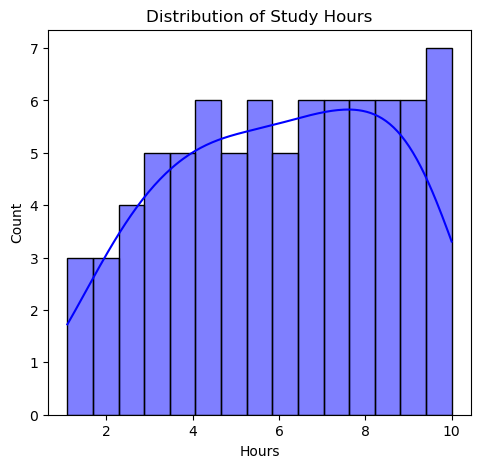

In [9]:
# Histogram for Hours and Scores
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Hours'], bins=15, kde=True, color='blue')
plt.title('Distribution of Study Hours')



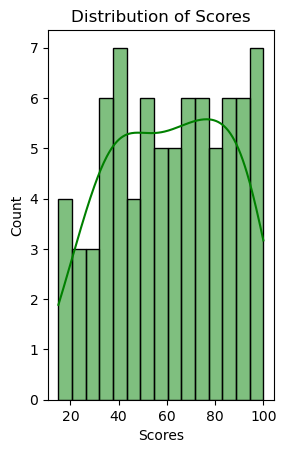

In [10]:
plt.subplot(1,2,2)
sns.histplot(df['Scores'], bins=15, kde=True, color='green')
plt.title('Distribution of Scores')
plt.show()

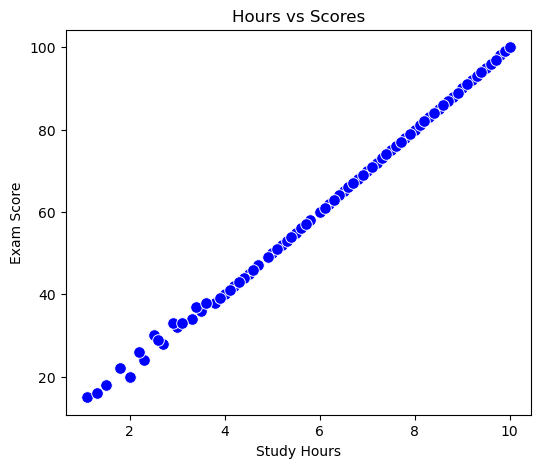

In [11]:
# Scatter Plot (Hours vs Scores)
plt.figure(figsize=(6,5))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue', s=70)
plt.title('Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

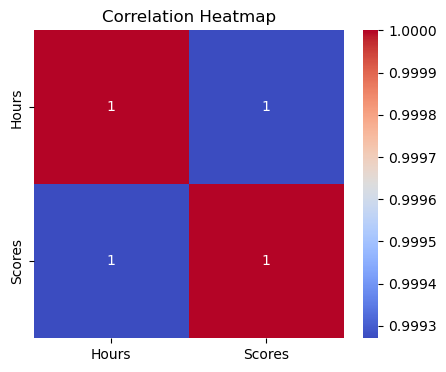

In [12]:
# Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = df[['Hours']]
y = df['Scores']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
print("\nModel Coefficient (Slope):", lr_model.coef_[0])
print("Model Intercept:", lr_model.intercept_)


Model Coefficient (Slope): 9.692502578825616
Model Intercept: 2.395893163057444


In [17]:
print(f"Interpretation: For every additional hour studied, score increases by approximately {lr_model.coef_[0]:.2f} marks.")


Interpretation: For every additional hour studied, score increases by approximately 9.69 marks.


In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:\n", comparison.head())



Actual vs Predicted:
     Actual  Predicted
30      92  91.566917
0       15  13.057646
22      72  72.181912
31      95  94.474668
18      62  62.489409


In [20]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [21]:
print("\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Evaluation Metrics:
MAE: 0.73
RMSE: 0.92
R² Score: 1.00


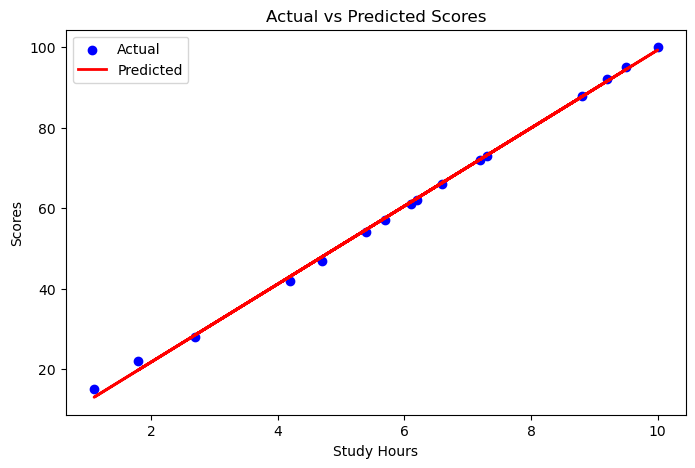

In [22]:
#Visualization – Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

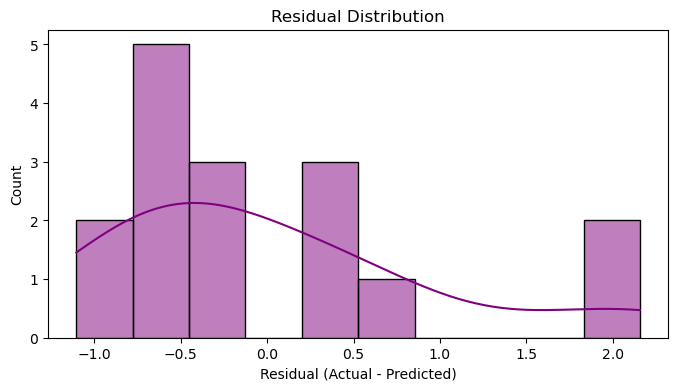

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=10, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()


In [32]:
#User Input Prediction
try:
    user_hours = float(input("\nEnter the number of study hours: "))
    user_pred = lr_model.predict([[user_hours]])
    print(f"Predicted Score for {user_hours} hours: {user_pred[0]:.2f}")
except:
    print("Invalid input! Please enter a numeric value.")


Enter the number of study hours:  6


Predicted Score for 6.0 hours: 60.55


C:\Users\Hardik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
#BONUS: Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [27]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [28]:
y_poly_pred = poly_model.predict(poly.transform(X_test))

In [29]:
poly_r2 = r2_score(y_test, y_poly_pred)
print(f"\nPolynomial Regression R² Score: {poly_r2:.2f}")


Polynomial Regression R² Score: 1.00


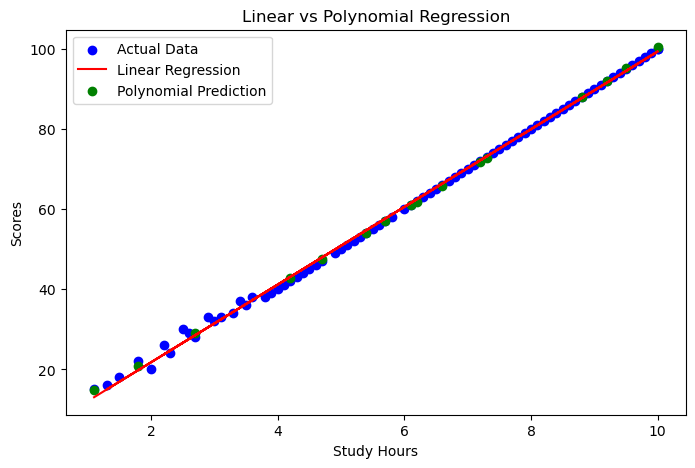

In [30]:
# Compare Linear vs Polynomial visually
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lr_model.predict(X), color='red', label='Linear Regression')
plt.scatter(X_test, y_poly_pred, color='green', label='Polynomial Prediction')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [31]:
import os

# Create 'images' folder if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# -----------------------------
# Save plots

# 1. Histogram for Hours and Scores
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Hours'], bins=15, kde=True, color='blue')
plt.title('Distribution of Study Hours')
plt.subplot(1,2,2)
sns.histplot(df['Scores'], bins=15, kde=True, color='green')
plt.title('Distribution of Scores')
plt.savefig('images/histograms.png')
plt.close()

# 2. Scatter Plot (Hours vs Scores)
plt.figure(figsize=(6,5))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue', s=70)
plt.title('Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.savefig('images/scatter_plot.png')
plt.close()

# 3. Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/heatmap.png')
plt.close()

# 4. Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.savefig('images/actual_vs_predicted.png')
plt.close()

# 5. Residual Analysis
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=10, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.savefig('images/residual_distribution.png')
plt.close()

# 6. Linear vs Polynomial Regression
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lr_model.predict(X), color='red', label='Linear Regression')
plt.scatter(X_test, y_poly_pred, color='green', label='Polynomial Prediction')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.savefig('images/linear_vs_polynomial.png')
plt.close()

print("✅ All plots have been saved in the 'images' folder.")


✅ All plots have been saved in the 'images' folder.
